In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [9]:
df_airquality = pd.read_csv('airquality.csv',usecols=['Ozone','Solar.R','Wind','Temp'])
df_airquality.info
df_airquality.shape
# print(the number)

(153, 4)

# 1.a : Relationship of each X and Y

Text(0.5, 1.0, 'Relationship of Temp and Ozone')

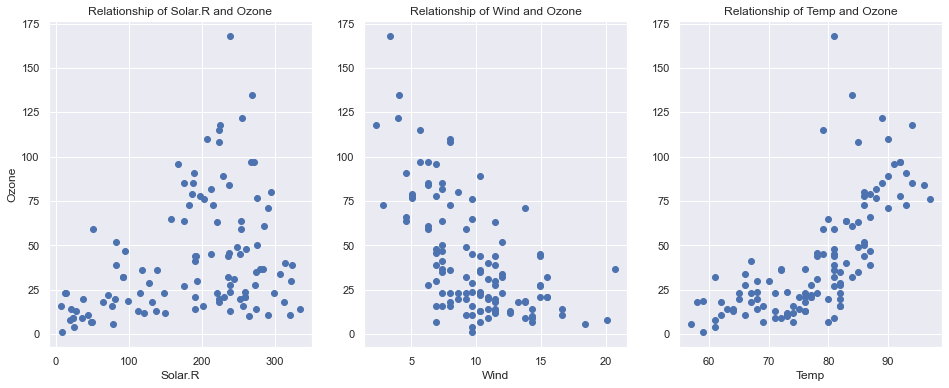

In [10]:
fig = plt.figure(figsize = (16,6))
plt.subplot(1,3,1)

plt.scatter(df_airquality['Solar.R'], df_airquality['Ozone'])
plt.xlabel('Solar.R')
plt.ylabel('Ozone')
plt.title('Relationship of Solar.R and Ozone')

plt.subplot(1,3,2)

plt.scatter(df_airquality['Wind'], df_airquality['Ozone'])
plt.xlabel('Wind')
plt.title('Relationship of Wind and Ozone')

plt.subplot(1,3,3)

plt.scatter(df_airquality['Temp'], df_airquality['Ozone'])
plt.xlabel('Temp')
plt.title('Relationship of Temp and Ozone')


# 1-a-1-Ozone Vs Solar.R:
In this scatter plot, we can see positive linear relationship but we don’t have equal variance and it seems we have heteroscedasticity dataset so we should correct this problem for example we can use ‘Transforming Data Technics’ such as semi-log models or log –log models . 


# 1-a-2- Ozone Vs wind:
 We can see negative linear relationship. in this dataset but there is some outlier detection. As the size of sample isn’t large it can be cause of some problems.


# 1-a 3-  Ozone Vs Temp:
We can see positive linear relationship in this dataset but there is some outlier detection.as the size of sample isn’t large it can be cause of some problems such as Ozone Vs Temp.


# 1.b : Relatinonship among the three explanatories


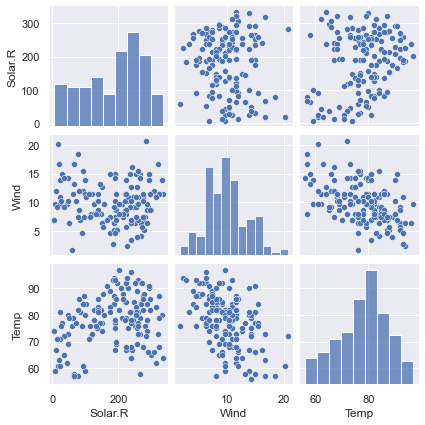

In [11]:
sb.pairplot(df_airquality,vars = ['Solar.R','Wind','Temp'], height=2)


# 1-b-1-Solar Vs Wind:
There is no special pattern in this dataset.




# 1-b-2: Solar Vs Temp
There is a pattern in this dataset but it isn’t linear relationship.


# 1-b-3: Wind VS Temp
It seems they have negative linear relationship and as we know correlation between feature can cause Multicollinearity.



# Part two of Question :

# Define the dependent and the independent variables

In [12]:
df_airquality_1 = df_airquality.copy()
print(df_airquality_1.isna().any())
print(df_airquality_1.isna().sum())

Ozone       True
Solar.R     True
Wind       False
Temp       False
dtype: bool
Ozone      37
Solar.R     7
Wind        0
Temp        0
dtype: int64


In [13]:
df_airquality_1 = df_airquality_1.dropna()
df_airquality_1.isna().any()
df_airquality_1.info

<bound method DataFrame.info of      Ozone  Solar.R  Wind  Temp
0     41.0    190.0   7.4    67
1     36.0    118.0   8.0    72
2     12.0    149.0  12.6    74
3     18.0    313.0  11.5    62
6     23.0    299.0   8.6    65
..     ...      ...   ...   ...
147   14.0     20.0  16.6    63
148   30.0    193.0   6.9    70
150   14.0    191.0  14.3    75
151   18.0    131.0   8.0    76
152   20.0    223.0  11.5    68

[111 rows x 4 columns]>

In [14]:
y = df_airquality_1 [['Ozone']]
x1 = df_airquality_1 [['Solar.R']]
x2 = df_airquality_1 [['Wind']]
x3 = df_airquality_1 [['Temp']]

#print(y.shape,"\n\n",x1.shape)

# Regression itself

In [15]:
x = sm.add_constant(x1)    # x1 is Solar.R
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\mzand\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     15.05
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           0.000179
Time:                        01:08:18   Log-Likelihood:                -538.86
No. Observations:                 111   AIC:                             1082.
Df Residuals:                     109   BIC:                             1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5987      6.748      2.756      0.007       5.225      31.973
Solar.R        0.1272      0.033      3.880      0.000       0.062       0.192
==============================================================================
Omnibus:                       23.356   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.348
Skew:                           1.128   Prob(JB):                     2.57e-07
Kurtosis:                       4.214   Cond. No.                         467.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x = sm.add_constant(x2) # x2 is wind
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\mzand\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     65.44
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           9.09e-13
Time:                        01:08:18   Log-Likelihood:                -519.94
No. Observations:                 111   AIC:                             1044.
Df Residuals:                     109   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.0413      7.472     13.254      0.000      84.231     113.851
Wind          -5.7288      0.708     -8.090      0.000      -7.132      -4.325
==============================================================================
Omnibus:                        9.375   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.508
Skew:                           0.708   Prob(JB):                      0.00862
Kurtosis:                       3.228   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x = sm.add_constant(x3)   # x3 is Temp
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\mzand\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     103.9
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           1.55e-17
Time:                        01:08:18   Log-Likelihood:                -508.89
No. Observations:                 111   AIC:                             1022.
Df Residuals:                     109   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -147.6461     18.755     -7.872      0.000    -184.818    -110.474
Temp           2.4391      0.239     10.192      0.000       1.965       2.913
==============================================================================
Omnibus:                       51.915   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.588
Skew:                           1.634   Prob(JB):                     6.11e-40
Kurtosis:                       8.326   Cond. No.                         647.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2.a: "This is the table of three t-values and slopes"

In [18]:
table = pd.DataFrame({'Feature':['Solar.R', 'wind', 'temp'],
                      'slope':[0.127,-5.728,2.439], 
                      't-value of slopes':[3.88,-8.09,10.192],'intercept':[18.599,99.04,-147.646]})
print(table)

   Feature  slope  t-value of slopes  intercept
0  Solar.R  0.127              3.880     18.599
1     wind -5.728             -8.090     99.040
2     temp  2.439             10.192   -147.646


# 2.b.1-Ozone Vs Solar.R:

The Regression line didn’t fit well. Maybe the reason is we don’t have equal variance and it seems we have heteroscedasticity dataset

Text(0, 0.5, 'Ozone')

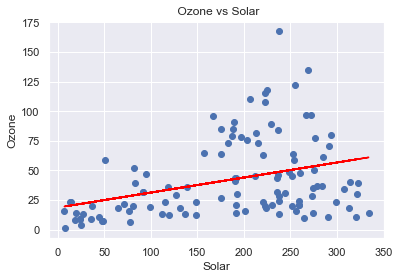

In [19]:
plt.scatter(x1,y)#Solar
yhat = table['slope'][0]*x1 + table['intercept'][0]
fig = plt.plot(x1,yhat, lw=1.5, c='red', label ='regression line')
plt.title(' Ozone vs Solar')
plt.xlabel('Solar')
plt.ylabel('Ozone')

# 2.b.2-Ozone Vs Wind:
The Regression line didn’t fit well but it is not too bad and it shows negative liner relation between Ozone Vs Wind.


Text(0, 0.5, 'Ozone')

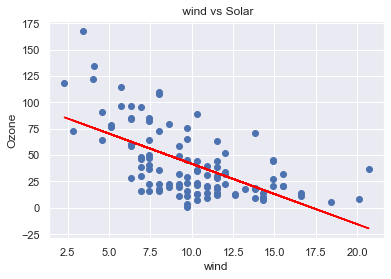

In [20]:
plt.scatter(x2,y)#wind
yhat = table['slope'][1]*x2 + table['intercept'][1]
fig = plt.plot(x2,yhat, lw=1.5, c='red', label ='regression line')
plt.title(' wind vs Solar')
plt.xlabel('wind')
plt.ylabel('Ozone')


# 2.b.3-Ozone Vs Temp:
The Regression line didn’t fit well but it seems this is better than previous features.
And there is positive liner relationship. 


Text(0, 0.5, 'Ozone')

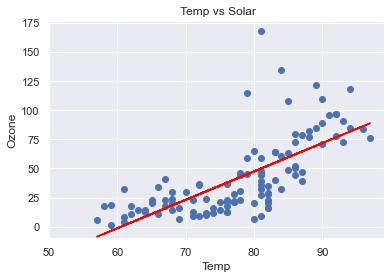

In [21]:
plt.scatter(x3,y)#Temp
yhat = table['slope'][2]*x3 + table['intercept'][2]
fig = plt.plot(x3,yhat, lw=1.5, c='red', label ='regression line')
plt.xlim(50)
plt.ylim(-10)
plt.title(' Temp vs Solar')
plt.xlabel('Temp')
plt.ylabel('Ozone')

# 3.Make a 3D plot of ozone against temperature and wind speed.
Rotate it around and notice to yourself what relationship the ozone might have jointly with 
temperature and wind.Take a screenshot from any angle you 
think helps you to see most of this relationship.No comments are needed.




In [22]:
Ozone = df_airquality_1 ['Ozone']
Wind = df_airquality_1 ['Wind']
Temp = df_airquality_1 ['Temp']

# ax.plot3D(Ozone,Wind,Temp,'gray')

## 3D Plot

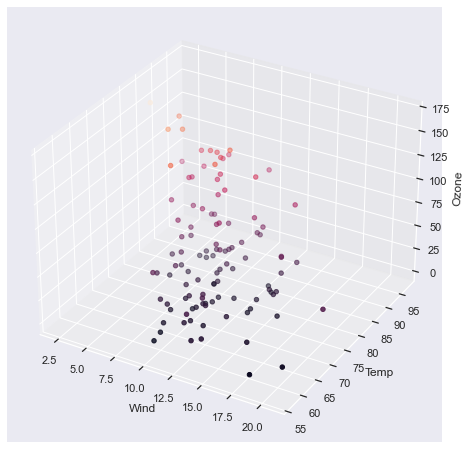

In [23]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
zdata = Ozone
xdata = Wind
ydata = Temp
ax.scatter3D(xdata, ydata, zdata, c = zdata) 
ax.set_xlabel('Wind')
ax.set_ylabel('Temp')
ax.set_zlabel('Ozone');

# در نمودار زیر می بینیم که با افزایش باد دما و اوزون کاهش می یابد و با افزایش دما باد کمتر و اوزون افزایش می یابد

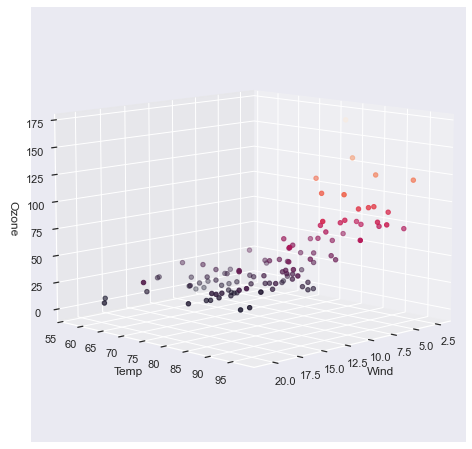

In [24]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
zdata = Ozone
xdata = Wind
ydata = Temp
ax.scatter3D(xdata, ydata, zdata, c=zdata)#, cmap='Greens');
ax.set_xlabel('Wind')
ax.set_ylabel('Temp')
ax.set_zlabel('Ozone')
ax.view_init(10, 45)     # با تغییر اعداد می توان زاویه دید را تغییر داد

# 4.Fit the multiple linear regression that corresponds

# to this 3D plot

In [25]:
y = df_airquality_1 [['Ozone']]

x1 = df_airquality_1 [['Wind','Temp']]

#print(y.shape,"\n\n",x1.shape)

x = sm.add_constant(x1)    
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\mzand\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     74.99
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           3.79e-21
Time:                        01:08:20   Log-Likelihood:                -497.71
No. Observations:                 111   AIC:                             1001.
Df Residuals:                     108   BIC:                             1010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.3220     23.621     -2.850      0.005    -114.143     -20.501
Wind          -3.2948      0.671     -4.909      0.000      -4.625      -1.965
Temp           1.8276      0.251      7.294      0.000       1.331       2.324
==============================================================================
Omnibus:                       36.789   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.460
Skew:                           1.281   Prob(JB):                     4.57e-19
Kurtosis:                       6.420   Cond. No.                         905.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4- a) As we see in below tables slopes and t-value aren’t much different in single regression and multiple regression.

In [26]:
# Multi regression- wind & temp
table_mul_var = pd.DataFrame({'Feature':['wind' , 'Temp'],
                      'slope':[-3.29,1.8], 
                      't-value of slopes':[-4.9,7.2],'intercept':-67.3220})
table_mul_var

,Feature,slope,t-value of slopes,intercept
0,wind,-3.29,-4.9,-67.322
1,Temp,1.80,7.2,-67.322


In [27]:
table_Single_var = pd.DataFrame({'Feature':['Solar.R', 'wind', 'temp'],
                      'slope':[0.127,-5.728,2.439], 
                      't-value of slopes':[3.88,-8.09,10.192],'intercept':[18.599,99.04,-147.646]})
table_Single_var

,Feature,slope,t-value of slopes,intercept
0,Solar.R,0.127,3.880,18.599
1,wind,-5.728,-8.090,99.040
2,temp,2.439,10.192,-147.646


# 4-b)The drawn surface is crossing via scattered points and it shows the regression has a suitable equation.

In [28]:
from mpl_toolkits import mplot3d
def f(Wind, Temp):
    return -3.29 * Wind + 1.8 * Temp + (-67.322)

zdata = Ozone
xdata = Wind
ydata = Temp

x = Wind
y = Temp

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

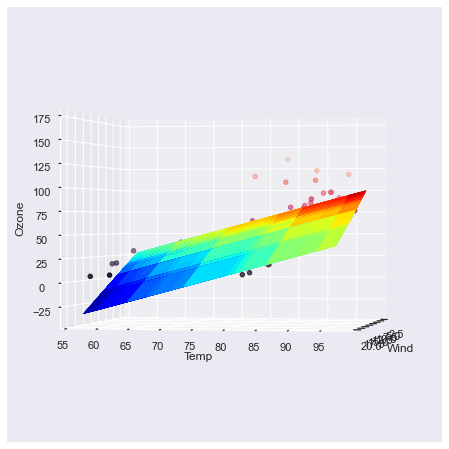

In [29]:
fig = plt.figure(figsize= (12,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1 ,cmap='jet', edgecolor = 'none')

zdata = Ozone
xdata = Wind
ydata = Temp

ax.scatter3D(xdata, ydata, zdata, c=zdata)
ax.set_xlabel('Wind')
ax.set_ylabel('Temp')
ax.set_zlabel('Ozone')
   
ax.view_init(0, 10)   # Change Angle.


# Analysis: By increasing the Temperature (temp) and decreasing the Wind, the Ozone Quantity increases
